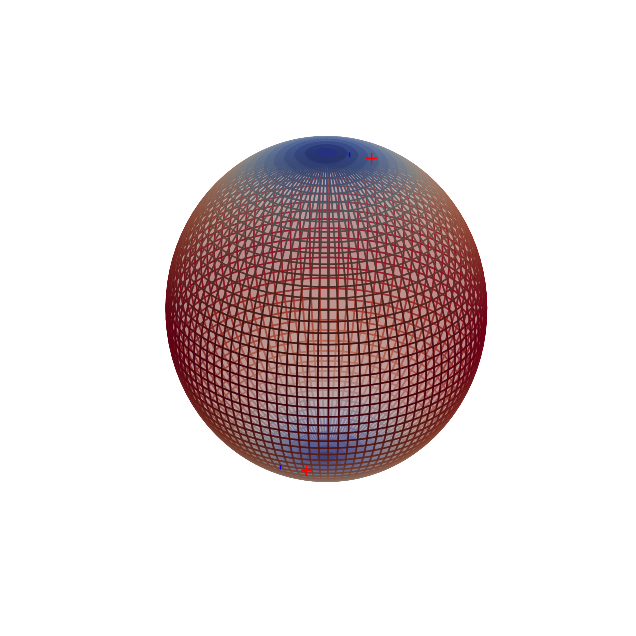

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# Create a sphere
phi = np.linspace(0, 2 * np.pi, 100)
theta = np.linspace(0, np.pi, 50)
phi, theta = np.meshgrid(phi, theta)
x = np.sin(theta) * np.cos(phi)
y = np.sin(theta) * np.sin(phi)
z = np.cos(theta)

# Differential rotation heatmap (higher rotation near the equator)
differential_rotation = np.abs(np.sin(theta))

# Initial magnetic field lines (stop at 30 degrees from the poles)
num_lines = 2
num_points = 1000
field_lines = []

for i in range(num_lines):
    field_line_theta = np.linspace(np.pi / 6, 5 * np.pi / 6, num_points)  # Stop at 30 degrees from the poles
    field_line_phi = np.full(num_points, np.linspace(0, 2 * np.pi, num_lines, endpoint=False)[i])
    field_line_x = np.sin(field_line_theta) * np.cos(field_line_phi)
    field_line_y = np.sin(field_line_theta) * np.sin(field_line_phi)
    field_line_z = np.cos(field_line_theta)
    field_lines.append((field_line_x, field_line_y, field_line_z, field_line_phi))

# Create the figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the sphere with the heatmap
sphere = ax.plot_surface(x, y, z, facecolors=plt.cm.coolwarm(differential_rotation), rstride=1, cstride=1, alpha=0.3)

# Plot the initial magnetic field lines
field_line_plots = []
for field_line in field_lines:
    field_line_plot, = ax.plot(field_line[0], field_line[1], field_line[2], color='black', linewidth=2)
    field_line_plots.append(field_line_plot)

# Remove grid lines and background
ax.grid(False)
ax.set_axis_off()
ax.set_box_aspect([1, 1, 1])  # Equal aspect ratio

# Increase visibility of field lines
plt.setp(field_line_plots, linewidth=3)

# Add sunspots
sunspot_size_large = 10
sunspot_size_small = 5
sunspot_alpha = 0.3  # Dim sunspots

# Northern hemisphere sunspots
sunspot_latitude_north = 50 * np.pi / 180  # 40 degrees in radians
sunspot_longitude = np.pi / 6  # Close to 30 degrees longitude
sunspot_positions_north = [(sunspot_latitude_north, sunspot_longitude), (sunspot_latitude_north, sunspot_longitude + 0.2)]
sunspot_plots_north = [
    ax.plot([], [], 'o', markersize=sunspot_size_large, color='black', alpha=sunspot_alpha)[0],
    ax.plot([], [], 'o', markersize=sunspot_size_small, color='black', alpha=sunspot_alpha)[0]
]

# Southern hemisphere sunspots
sunspot_latitude_south = -50 * np.pi / 180  # -40 degrees in radians
sunspot_positions_south = [(sunspot_latitude_south, sunspot_longitude), (sunspot_latitude_south, sunspot_longitude + 0.2)]
sunspot_plots_south = [
    ax.plot([], [], 'o', markersize=sunspot_size_large, color='black', alpha=sunspot_alpha)[0],
    ax.plot([], [], 'o', markersize=sunspot_size_small, color='black', alpha=sunspot_alpha)[0]
]

# Combine all sunspot plots
sunspot_plots = sunspot_plots_north + sunspot_plots_south

# Add '+' signs on the sunspots
plus_signs_north = [
    ax.text(0, 0, 0, '+', color='red', ha='center', va='center', alpha=sunspot_alpha, fontsize=13),
    ax.text(0, 0, 0, '-', color='blue', ha='center', va='center', alpha=sunspot_alpha, fontsize=13)
]

plus_signs_south = [
    ax.text(0, 0, 0, '-', color='blue', ha='center', va='center', alpha=sunspot_alpha, fontsize=13),
    ax.text(0, 0, 0, '+', color='red', ha='center', va='center', alpha=sunspot_alpha, fontsize=13)
]

# Combine all plus signs
plus_signs = plus_signs_north + plus_signs_south

# Animation function to update the field lines
def animate(i):
    if i >= 300:  # Stop after 300 frames (corresponding to around 15 seconds)
        ani.event_source.stop()
    else:
        # Rotate the sphere quicker
        ax.view_init(elev=30, azim=(i * 8) % 360)

        # Increase spiraling effect without unwinding
        for j, field_line in enumerate(field_lines):
            field_line_theta = np.linspace(np.pi / 6, 5 * np.pi / 6, num_points)  # Stop at 30 degrees from the poles
            stretch_factor = 1 + 3 * np.sin(field_line_theta)  # Do not modify rotation by time
            field_line_phi = field_line[3] + i * np.pi / 45 * stretch_factor  # Quicker rotation
            field_line_x = np.sin(field_line_theta) * np.cos(field_line_phi)
            field_line_y = np.sin(field_line_theta) * np.sin(field_line_phi)
            field_line_z = np.cos(field_line_theta)
            field_line_plots[j].set_data(field_line_x, field_line_y)
            field_line_plots[j].set_3d_properties(field_line_z)

        # Fade out the field lines and show sunspots
        if i >= 180:
            alpha = max(0, 1 - (i - 180) ** 2 / 90)
            for field_line_plot in field_line_plots:
                field_line_plot.set_alpha(alpha)
            sunspot_alpha = min(1, (i - 180) / 90)
            for j, sunspot_plot in enumerate(sunspot_plots):
                sunspot_plot.set_alpha(sunspot_alpha)
                lat, lon = (sunspot_positions_north + sunspot_positions_south)[j]
                x = np.sin(lat) * np.cos(lon)
                y = np.sin(lat) * np.sin(lon)
                if lat < 0:
                    z = -np.cos(-lat)
                else:
                    z = np.cos(lat)
                sunspot_plot.set_data([x], [y])
                sunspot_plot.set_3d_properties([z])
                plus_signs[j].set_position((x, y))
                plus_signs[j].set_3d_properties(z, 'z')
                plus_signs[j].set_alpha(sunspot_alpha)
    return sphere, *field_line_plots, *sunspot_plots, *plus_signs

# Create the animation
ani = FuncAnimation(fig, animate, frames=360, interval=20, blit=False)
ani.save('sunspotsimulation.gif', writer='pillow') 

# Display the animation
plt.show()